## 총점 및 순위 계산

In [1]:
########### file_name 선언 ##################################
전처리데이터셋 = '전처리_최종본.csv'
##########################################################

### 2. 화면에 출력되는 칼럼명을 확인한 후, 필요한 칼럼명을 복사하여 붙여넣기 (수정 불필요)

In [2]:
import pandas as pd
df = pd.read_csv(f'{전처리데이터셋}', header=0, encoding='cp949', engine='python')
df.set_index('연번', inplace=True)
전체칼럼 = df.columns.tolist()
print ("여기 칼럼명을 확인하신 후 점수계산에 필요한 칼럼명만 복사 하세요.\n", 전체칼럼)

여기 칼럼명을 확인하신 후 점수계산에 필요한 칼럼명만 복사 하세요.
 ['Station 스테이션/성명', '업무건물', '주거건물', '기타건물', '대전지하철역', '사고량', '타슈이용량', '총이용승객', '경제인구수', '교통량', '하천여부', '경도', '위도']


### 3. 하단에 있는 "점수칼럼"에 점수로 환산할 대상인 칼럼을 수정하도록 함 ==> 수정 필요

In [3]:
#점수칼럼 =  ['건물1', '건물2', '건물3', '관공서', '도서관', '경제인구', '교통량', '전기차', '관광지']
점수칼럼 =  ['업무건물', '주거건물', '기타건물', '대전지하철역', '사고량', '타슈이용량', '총이용승객', '경제인구수', '교통량', '하천여부']
print("입력한 점수컬럼명은 다음과 같음\n", 점수칼럼)

가중치 = [1] * len(점수칼럼)

입력한 점수컬럼명은 다음과 같음
 ['업무건물', '주거건물', '기타건물', '대전지하철역', '사고량', '타슈이용량', '총이용승객', '경제인구수', '교통량', '하천여부']


### 4. 건물 가중치 선언 ==> 필요시 수정
- 각 건물과 관광지에 대한 가중치를 수기로 선언함
- 필요시 가중치 조절 하십시오 
- 필요시 가중치 추가 또는 삭제 하십시오

In [4]:
kkkk = pd.read_csv('엔트로피_가중치.csv', encoding='euc-kr')
value = kkkk['weight'].tolist()
value

[0.06245,
 0.04816,
 0.14004,
 0.20263,
 0.20956,
 0.03639,
 0.05354,
 0.02673,
 0.05512,
 0.16538]

In [62]:
#점수칼럼  순서대로 점수칼럼 갯수만큼 가중치를 입력하십시오

#예를들어 이렇게 가중치를 주고 싶을 경우에는
#건물1가중치=1
#건물2가중치 = 2
#건물3가중치  = 3
#관광지가중치=1
#도서관가충치=1
#경제인구가중치=1
#전기차가중치=1
#아래 처럼 입력합니다.

##### 여기만 수정하면 됩니다 ###############################
   # 점수칼럼 갯수 만큼, 구분은 쉼표
가중치 = value
##### 여기만 수정하면 됩니다 ###############################


# 수정 불필요
if (len(가중치) != len(점수칼럼)):
    print("입력한 가중치 갯수가 점수칼럼 갯수와 다르므로 확인후 다시 입력 바랍니다")
else:
    print("다음 줄을 실행 하세요")

다음 줄을 실행 하세요


### 5. 이하 별도 언급 시까지 수정 불필요
- 6.1에서 수정 필요

In [63]:
df = pd.read_csv(f'{전처리데이터셋}', header=0, encoding='cp949', engine='python')
df.set_index('연번', inplace=True)

################## QGIS에서 작업한 전처리 결과 CSV 읽기 ####################################################
pre_process_set = pd.read_csv(f'{전처리데이터셋}', header=0, encoding='cp949', engine='python')
pre_process_set = pre_process_set.sort_values(by='연번')

# Null 이 있을 수 있는 칼럼은 Null을 0로 변경
pre_process_set.fillna(0, inplace=True)
##################  QGIS에서 작업한 전처리 결과 CSV 읽기 끝###################################################

################## MinMax정규화 ##########################################################################
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 점수칼럼 정규화
norm = pre_process_set.copy()
norm.fillna(0, inplace=True)
norm.set_index('연번', inplace=True)

norm[점수칼럼] = scaler.fit_transform(norm.loc[:,점수칼럼])
norm.reset_index(inplace=True)
################## 정규화 끝################################################################################


# 총점 계산
df = norm.copy()

for i in range(0, len(점수칼럼)):
    name = 점수칼럼[i]
    df[name] = df[name] * 가중치[i] 

df.set_index(['연번','경도','위도'], inplace=True)

df['sum'] = df.sum(1)
df.reset_index(inplace=True)

# 등수 계산 
df['순위'] = df['sum'].rank(method='dense', ascending=False).astype(int)

final = df.sort_values(by='순위')
final.reset_index(drop=True, inplace=True)

# 상위 20개만 학인
display("결과", final.head(20))

# 최종 결과 CSV 파일쓰기
final.to_csv('결과_총점.csv', index=False, sep=',', encoding='cp949')

'결과'

,연번,경도,위도,Station 스테이션/성명,업무건물,주거건물,기타건물,대전지하철역,사고량,타슈이용량,총이용승객,경제인구수,교통량,하천여부,sum,순위
0,19,127.388631,36.351585,현대아이텔(시청역 6번출구),0.154545,0.000073,0.000000,0.05,0.066316,0.086643,0.014602,0.016475,0.000000,0.0,0.388654,1
1,59,127.341248,36.354315,유성온천역 6번출구,0.042500,0.000120,0.000000,0.05,0.170526,0.062826,0.034555,0.026656,0.000836,0.0,0.388020,2
2,17,127.378543,36.352338,타임월드,0.104318,0.000094,0.000000,0.00,0.066316,0.111836,0.059960,0.018085,0.000308,0.0,0.360918,3
3,133,127.405826,36.328365,오룡역 7번출구,0.065682,0.001786,0.000039,0.05,0.180000,0.028361,0.007839,0.017173,0.003175,0.0,0.354056,4
4,3,127.387783,36.367932,한밭수목원1,0.000000,0.000000,0.000000,0.00,0.000000,0.350000,0.000000,0.000000,0.000000,0.0,0.350000,5
5,186,127.387783,36.367932,한밭수목원2,0.000000,0.000000,0.000000,0.00,0.000000,0.295891,0.000000,0.000000,0.000000,0.0,0.295891,6
6,33,127.361819,36.358191,월평역 2번출구(육교밑),0.011591,0.000927,0.000000,0.05,0.000000,0.109330,0.004166,0.017625,0.001865,0.1,0.295504,7
7,31,127.357435,36.361800,대전광역시 유성구청,0.007727,0.000802,0.000000,0.00,0.000000,0.153683,0.001724,0.015415,0.000797,0.1,0.280149,8
8,143,127.426029,36.327775,중앙로역 3번출구,0.108182,0.000245,0.000000,0.05,0.000000,0.056166,0.055720,0.007116,0.000671,0.0,0.278100,9
9,12,127.381587,36.357975,정부청사역 4번출구,0.085000,0.000000,0.000000,0.05,0.056842,0.056755,0.025481,0.002818,0.000930,0.0,0.277827,10


## 6. 지도로 보기
- 인터넷 환경이 안되면 생략

### 6.1 지도로 보기 선택 사항
- 상단에서 도출된 결과값들 중에서 상위 3개만 지도로 보여주기
- Google Map 처럼 보여지며, 마우스로 스크롤하면 지도 크기가 Zoom 됨
- 이를 위해서 Anaconda Promprt 창을 열고 아래 함수를 복사하여 그대로 엔터
 - pip install folium

#### 수정 필요 - 수정 안하면 상위 20개를 조회

In [19]:
# 보고 싶은 상위권 갯수를 입력하세요
지도보기갯수 = 20   # 보고싶은 상위권 갯수를 여기에 입력, 만약 3이면 최상위 3개만 보겠다는 의미

### 6.2 수정 불필요

In [21]:
!pip install folium

  Using cached folium-0.12.1-py2.py3-none-any.whl (94 kB)
  Using cached branca-0.4.2-py3-none-any.whl (24 kB)


In [23]:
# 지도로 보여주기
import folium
print(f"보고자 하는 상위권 갯수는 {지도보기갯수}개 입니다.")
for i in range(지도보기갯수):
    지도보기 = folium.Map(location=[final.loc[i,'위도'],final.loc[i,'경도']], zoom_start = 15)
    folium.Marker([final.loc[i,'위도'],final.loc[i,'경도']]).add_to(지도보기)
    print (final.loc[i,'위도'],final.loc[i,'경도'])
    j = i+1
    display(f'상위 {j}번째 격자의 센터 위치 보기', 지도보기)

보고자 하는 상위권 갯수는 20개 입니다.
36.32253597 127.3984692


'상위 1번째 격자의 센터 위치 보기'

36.34987449 127.4154155


'상위 2번째 격자의 센터 위치 보기'

36.3848179 127.3491091


'상위 3번째 격자의 센터 위치 보기'

36.37923744 127.4064249


'상위 4번째 격자의 센터 위치 보기'

36.36253674 127.3440513


'상위 5번째 격자의 센터 위치 보기'

36.44845573 127.4290338


'상위 6번째 격자의 센터 위치 보기'

36.30469318 127.3513683


'상위 7번째 격자의 센터 위치 보기'

36.43172001 127.3868747


'상위 8번째 격자의 센터 위치 보기'

36.35660058 127.3418996


'상위 9번째 격자의 센터 위치 보기'

36.32607466 127.39657


'상위 10번째 격자의 센터 위치 보기'

36.31517337 127.3440635


'상위 11번째 격자의 센터 위치 보기'

36.3474232 127.3898359


'상위 12번째 격자의 센터 위치 보기'

36.43186487 127.4259372


'상위 13번째 격자의 센터 위치 보기'

36.33697833 127.447843


'상위 14번째 격자의 센터 위치 보기'

36.44876257 127.4444181


'상위 15번째 격자의 센터 위치 보기'

36.47801527 127.4001877


'상위 16번째 격자의 센터 위치 보기'

36.34707504 127.3933793


'상위 17번째 격자의 센터 위치 보기'

36.449494 127.4566956


'상위 18번째 격자의 센터 위치 보기'

36.36480928 127.4410948


'상위 19번째 격자의 센터 위치 보기'

36.36981585 127.4294439


'상위 20번째 격자의 센터 위치 보기'

### 6. Box Plot 보기 선택 사항 - 수정 불필요
- 상기 선택사항 실행여부와 무관하게 9번은 실행가능함
- 값들이 몇점대에 몰려 있는지 확인해보는 Box Plot 그래프
- 맨 하단부에 몰려 있을 가능성이 높음. 이유는 절반이상이 0점이기 때문

In [24]:
#참고) 총점 분포도
import matplotlib.pyplot as plt

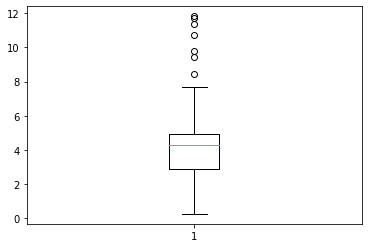

In [25]:
plt.figure()
plt.boxplot(final['sum'])
plt.show()

끝